In [2]:
import numpy as np
import time
import matplotlib.pyplot as pyplot
import seaborn as sns
import pandas as pd
import csv

from main import run_direct_estimation, run_importance_sampling, run_adaptive_importance_sampling

In [3]:
# Define parameters for estimation methods
trial_size_increment = 5
max_trial_exp = 3
gui = False
hill = True
policy_file = './best_hill_climbing_policy.pkl'
depth = 1000
np.random.seed(42)

In [4]:
# Run direct estimation
# stores n, p_failure, std_error, runtime
results_de = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i + 1)
    p_failure_de, std_error_de = run_direct_estimation(
        trials, 
        gui,
        hill,  # Pass hill climbing flag
        policy_file if hill else None  # Pass policy file only if using hill climbing
    )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_de['n'].append(trials)
    results_de['p_fail'].append(p_failure_de)
    results_de['std_error'].append(std_error_de)
    results_de['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Failure Probability: {p_failure_de:.4f} ± {std_error_de:.4f}")
    print(f"95% Confidence Interval: [{p_failure_de - 1.96*std_error_de:.4f}, {p_failure_de + 1.96*std_error_de:.4f}]")


Running direct estimation with 5 trials...
Using hill climbing policy
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Starting direct estimation with 5 trials...
Completed 0/5 trials...


c:\Users\jaf25\anaconda3\envs\FPERG\lib\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")



Results:
Failure Probability: 0.2000 ± 0.1789
Based on 1 failures in 5 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.2000 ± 0.1789
95% Confidence Interval: [-0.1506, 0.5506]

Running direct estimation with 25 trials...
Using hill climbing policy
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Starting direct estimation with 25 trials...
Completed 0/25 trials...

Results:
Failure Probability: 0.0000 ± 0.0000
Based on 0 failures in 25 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.0000 ± 0.0000
95% Confidence Interval: [0.0000, 0.0000]

Running direct estimation with 125 trials...
Using hill climbing policy
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Starting direct estimation with 125 trials...
Completed 0/125 trials...
Completed 50/125 trials...
Completed 100/125 trials...

Results:
Failure Probability: 0.0000 ± 

In [5]:
# Run importance sampling
# stores n, p_failure, std_error, runtime
results_ims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i+1)
    failure_prob, std_error = run_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_ims['n'].append(trials)
    results_ims['p_fail'].append(failure_prob)
    results_ims['std_error'].append(std_error)
    results_ims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running importance sampling with 5 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Number of samples: 5
Estimated failure probability: 0.000000

Final Results:
Estimated Failure Probability: 0.0000
95% Confidence Interval: [0.0000, 0.0000]

Running importance sampling with 25 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Number of samples: 25
Log weights stats: -4.139381142689672 -0.5417300167150096 4.190538535727683
Normalized weights stats: 0.0001480588827795855 0.04 0.613864641766158
Sample of normalized weights: [0.0059083  0.00870201 0.00278488 0.06338687 0.10428525 0.00712318
 0.00685203 0.00146611 0.00369096 0.00017686]
Log weights stats: -3.2061614739304787 -0.34657253622186546 2.294862628212286
Normalized weights stats: 0.0010723128968169462 0.04 0.26265516274153644
Sample of normalized weights: [0.00971476 0.00867613 0.0445707  0.17979387 0.26265516 0.0255298
 0.02619898 0.01036937 0.001144

In [6]:
# Run adaptive importance sampling
results_aims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment**(i+1)
    failure_prob, std_error = run_adaptive_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_aims['n'].append(trials)
    results_aims['p_fail'].append(failure_prob)
    results_aims['std_error'].append(std_error)
    results_aims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running adaptive importance sampling with 5 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Number of samples: 5
Number of elite samples: 3
Completed 0/10 iterations...
Log weights stats: 0.6660061890579527 0.6958461109552445 0.7248879137059703
Normalized weights stats: 0.24258210763814178 0.25 0.2572946602128791
Sample of normalized weights: [0.24258211 0.25729466 0.25406436 0.24605887]
Log weights stats: 0.6617234469213145 0.6829421929223827 0.7210600637499738
Normalized weights stats: 0.24468036287127765 0.25 0.2596382547268034
Sample of normalized weights: [0.25963825 0.25065039 0.24468036 0.24503099]
Estimated failure probability: 0.000000

Final Results:
Estimated Failure Probability: 0.0000
95% Confidence Interval: [0.0000, 0.0000]

Running adaptive importance sampling with 25 trials and depth 1000...
Loaded hill climbing policy from ./best_hill_climbing_policy.pkl
Number of samples: 25
Number of elite samples: 3
Completed 0/10 iteratio

In [7]:
# save results to csv
filename = "de_results" + str(time.time_ns()) + "_depth_" + str(depth) + "_max_step_" + str(trial_size_increment**max_trial_exp)
with open(filename, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(results_de.keys())
    writer.writerows(zip(*results_de.values()))

filename = "ims_results_" + str(time.time_ns()) + "_depth_" + str(depth) + "_max_step_" + str(trial_size_increment**max_trial_exp)
with open(filename, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(results_ims.keys())
    writer.writerows(zip(*results_ims.values()))

filename = "aims_results_" + str(time.time_ns()) + "_depth_" + str(depth) + "_max_step_" + str(trial_size_increment**max_trial_exp)
with open(filename, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(results_aims.keys())
    writer.writerows(zip(*results_aims.values()))

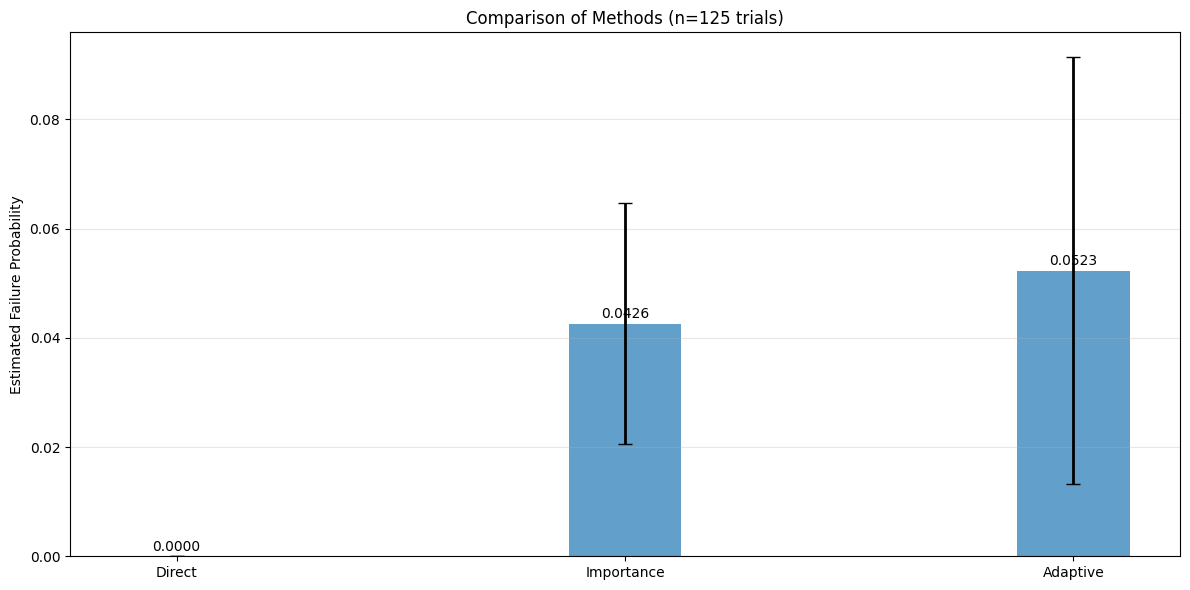

In [8]:
# plot estimates with 95% confidence intervals
fig, ax = pyplot.subplots(figsize=(12, 6))
methods = ['Direct', 'Importance', 'Adaptive']
x = np.arange(len(methods))
width = 0.25

# get values for the largest trial size
largest_idx = -1
p_vals = [results_de['p_fail'][largest_idx], 
          results_ims['p_fail'][largest_idx], 
          results_aims['p_fail'][largest_idx]]
errors = [1.96 * results_de['std_error'][largest_idx],
          1.96 * results_ims['std_error'][largest_idx],
          1.96 * results_aims['std_error'][largest_idx]]

bars = ax.bar(x, p_vals, width, yerr=errors, capsize=5, 
             alpha=0.7, ecolor='black', error_kw={'elinewidth': 2})

ax.set_ylabel('Estimated Failure Probability')
ax.set_title(f'Comparison of Methods (n={results_de["n"][largest_idx]} trials)')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.0005,
            f'{height:.4f}', ha='center', va='bottom')

pyplot.tight_layout()
pyplot.show()

In [14]:
metrics = ['Failure Probability', 'Standard Error', 'Runtime (ns)']
methods = ['DE', 'IS', 'AIS']
trial_sizes = results_de['n']

for i, n in enumerate(trial_sizes):
    # get metric values for each method at this trial size
    p_vals = [results_de['p_fail'][i], results_ims['p_fail'][i], results_aims['p_fail'][i]]
    se_vals = [results_de['std_error'][i], results_ims['std_error'][i], results_aims['std_error'][i]]
    rt_vals = [results_de['runtime'][i], results_ims['runtime'][i], results_aims['runtime'][i]]
    
    # normalize the values for better visualization
    p_norm = [v / max(p_vals) if max(p_vals) > 0 else 0 for v in p_vals]
    se_norm = [min(se_vals) / v if v > 0 else 1 for v in se_vals]
    rt_norm = [min(rt_vals) / v if v > 0 else 1 for v in rt_vals]
    
    # creat data for this trial size
    data = []
    for j, method in enumerate(methods):
        for metric, value in zip(metrics, [p_norm[j], se_norm[j], rt_norm[j]]):
            data.append({
                'Method': method,
                'Metric': metric,
                'Value': value
            })
    
    df = pd.DataFrame(data)
    df_pivot = df.pivot(index='Method', columns='Metric', values='Value')
    pyplot.figure(figsize=(10, 5))
    ax = sns.heatmap(df_pivot, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
    pyplot.title(f'Normalized Performance Metrics for n={n} trials', fontsize=14)
    pyplot.xticks(rotation=30, ha='right')
    pyplot.tight_layout()
    pyplot.savefig(f'performance_metrics_n{n}.png', dpi=300, bbox_inches='tight')
    pyplot.close()  # Close this figure before creating the next one
    
    print(f"Created and saved plot for n={n}")

print("All plots have been created and saved.")

Created and saved plot for n=5
Created and saved plot for n=25
Created and saved plot for n=125
All plots have been created and saved.


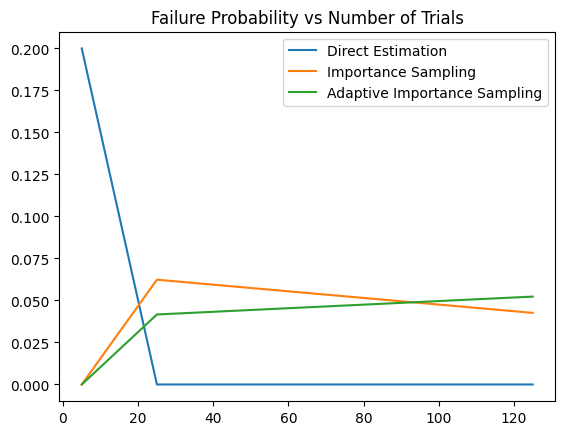

In [16]:
# failure probability graph
pyplot.plot(results_de['n'], results_de['p_fail'])
pyplot.plot(results_ims['n'], results_ims['p_fail'])
pyplot.plot(results_aims['n'], results_aims['p_fail'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Failure Probability vs Number of Trials")
pyplot.show()

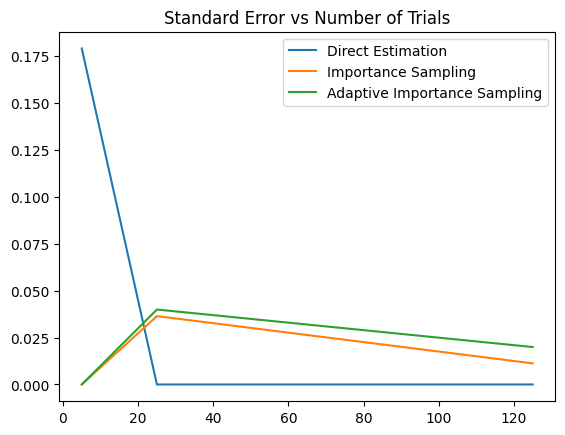

In [17]:
# standard error graph
pyplot.plot(results_de['n'], results_de['std_error'])
pyplot.plot(results_ims['n'], results_ims['std_error'])
pyplot.plot(results_aims['n'], results_aims['std_error'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Standard Error vs Number of Trials")
pyplot.show()

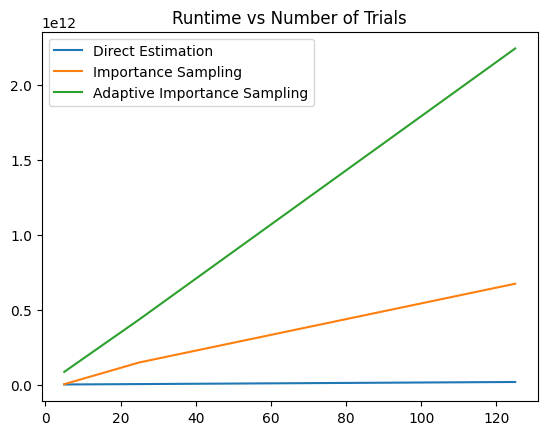

In [18]:
# runtime graph
pyplot.plot(results_de['n'], results_de['runtime'])
pyplot.plot(results_ims['n'], results_ims['runtime'])
pyplot.plot(results_aims['n'], results_aims['runtime'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Runtime vs Number of Trials")
pyplot.show()